# Bosonic Gates
B. McDonough \
J. Cui \
G. Marous

### Contents
1. Approaches to transformations
2. Gaussian gates
    1. Phase space rotation
    2. Displacement
    3. Single-mode squeezing
    4. Two-mode squeezing
    5. Beamsplitter
3. Controlled gates
4. Example: geometric phase of sequential displacements

The goal of Bosonic Qiskit is to "develop an instruction set architecture (ISA) for hybrid qubit/bosonic mode systems that contains an inventory of the fundamental operations and measurements that are possible in such hardware." The instructions in the instruction set are the gates that can be implemented on hardware and allow for the manipulation of quantum information stored in coupled qubit-bosonic mode systems. Here, we will explore some of the gates available in the Bosonic Qiskit library.

## Approaches to transformations
A transformation of quantum states is described by some unitary operator $U$. This operator is completely characterized by its matrix elements $U_{mn}$, which are given by $\langle m | U |n \rangle$, where $|m\rangle$ and $|n\rangle$ belong to an orthonormal basis. However, in quantum mechanics, the only measurable quantities are the expectation values of Hermitian operators. If $\hat A$ is a Hermitian observable and $|\psi\rangle$ is some quantum state, then $U$ transforms the expectation value of $\hat A$ via $\langle \psi | \hat A | \psi \rangle \to \langle\psi| U^\dagger \hat A U |\psi\rangle$. This can be viewed from two perspectives: either a *state* transformation $|\psi\rangle \to U|\psi\rangle$, or an *operator* transformation $A \to U^\dagger A U$.

There are several approaches that can be taken to find $U^\dagger A U$ in many situations. When $U = e^{X}$ for some operator $X$, then the transformation can be computed explicitly using the Baker-Campbell-Hausedorff formula:
$$
e^{X}Ae^{-X} = \sum_{n=0}^{\infty}\frac{[(X)^n, A]}{n!}
$$
Where we have defined the repeated commtuator $[(X)^n, Y] \equiv [X, [X, [ ..., [X, Y]...]$, and $[(X)^0,Y] = Y$. We will not use this formula, but we will use a simpler version, the Baker-Campbell-Hausedorff Lemma, described below:

### The Baker-Campbell-Hausedorff Lemma
The rule for exponentiating scalars $e^ae^b = e^{a+b}$ is so familiar that most of the time we don't give it a second thought. However, if $A$ and $B$ are matrices, then in general $e^Ae^B \neq e^{A+B}$. The lemma says that if $A$ and $B$ are operators such that $[[A,B],A] = [[A,B],B] = 0$, then the following identity holds:
$$
e^A e^B = e^{A+B}e^{[A,B]/2}
$$

**Excercise:** Prove this Lemma by defining the functions $f(\alpha) = e^{\alpha A}e^{\alpha B}$ and $g(\alpha) = e^{\alpha(A+B)}e^{\alpha^2[A,B]/2}$, then taking the first derivative with respect to $\alpha$ and using $[e^{\alpha A}, B] = \alpha e^{\alpha A}[A, B]$ to prove that $f$ and $g$ satisfy the same differential equation. Since obviously $f(0) = g(0)$ and $f$ and $g$ are both continuous functions of $\alpha$, using $\alpha = 1$ gives the BCH Lemma.

### Differential equation approach:
The second approach to computing this transformation involves solving an operator differential equation. Let $A$ be an anti-hermitian operator, and let $U = e^{\theta A}$. For any operator $B$, denote $U^\dagger BU$ by $B_U$. By taking the derivative of $U$, we find
\begin{align*}
\frac{\partial U}{\partial \theta} &= AU
& \frac{\partial U^\dagger}{\partial \theta} &= -U^\dagger A
\end{align*}
Then, we take the derivative of $B_U$, finding
$$
\frac{\partial B_U}{\partial \theta} = \frac{\partial}{\partial \theta}(U^\dagger B U) = 
\frac{\partial U^\dagger}{\partial \theta}B U +
U^\dagger B \frac{\partial U}{\partial \theta} = U^\dagger BA U - U^\dagger AB U = [B,A]_U
$$
This is a differential equation that can oftentimes be solved to find $B_U$ as a function of $\theta$.

**Exercise**: Integrate the Schrodinger equation $i\frac{\partial}{\partial t} |\psi\rangle = H |\psi \rangle$ for a time-independent $H$ to find that $|\psi(t)\rangle = U(t)|\psi(0)\rangle$, where $U(t) = e^{-iHt}$. Then the expectation of a Hermitian observable $\hat A$ at time $t$ is $\langle \psi(t)|\hat A|\psi(t)\rangle = \langle \psi(0)|U^\dagger \hat A U |\psi(0)\rangle = \langle \psi(0)|\hat A_U |\psi(0)\rangle$. Apply the identity above to the anti-Hermitian matrix $-iH$. The resulting expression is called Heisenberg's equation of motion.

## Gaussian Gates
### Phase space rotation
The phase space rotation gate is defined as $r(\theta) \equiv e^{i\theta \hat n}$. Since $|\hat n\rangle$ is diagonal in the number basis, we can write
$$
r(\theta) = e^{i\theta \hat n} = \sum_{n=0}^\infty e^{i\theta n}|n\rangle \langle n|
$$
This form shows that the effect of this gate is to apply the phase $(e^{i\theta})^n$ to the state $|n\rangle$. Using the identity for the anti-Hermitian matrix $A = i\hat n$ and the unitary $U = e^{\theta A}$, we have
$$
\frac{\partial}{\partial \theta}X_U = U^\dagger[X, i\hat n]U = \frac{i}{\sqrt{2}}U^\dagger([a, a^\dagger a]+[a^\dagger, a^\dagger a])U
= \frac{i}{\sqrt{2}}U^\dagger([a, a^\dagger]a+a^\dagger[a^\dagger, a])U
= -U^\dagger\left(\frac{a-a^\dagger}{i\sqrt{2}}\right)U
= -P_U
$$
and
$$
\frac{\partial}{\partial \theta}P_U = U^\dagger[P, i\hat n]U = \frac{1}{\sqrt{2}}U^\dagger([a, a^\dagger a]-[a^\dagger, a^\dagger a])U
= \frac{1}{\sqrt{2}}U^\dagger([a, a^\dagger]a-a^\dagger[a^\dagger, a])U
= U^\dagger\left(\frac{a+a^\dagger}{\sqrt{2}}\right)U
= X_U
$$
We can then uncouple these differential equations by taking another derivative with respect to $\theta$, giving
\begin{align}
\frac{\partial^2}{\partial \theta^2}X_U &= -X_U
& \frac{\partial^2}{\partial \theta^2}P_U &= -P_U
\end{align}
This gives $X_U(\theta) = A \cos(\theta) + B\sin(\theta)$, and using $X_U(0) = X$, we find $A = X$. From the first differential equation we have $\frac{\partial}{\partial \theta}X_U\Big|_{\theta=0} = -P_U(0) = -P = B$. Similarly, we have $P_U(\theta) = C\cos(\theta) + D\sin(\theta)$, and imposing the same boundary conditions gives $C = P$ and $D = X$. Putting these two equations into matrix form, we find
$$
\begin{pmatrix}
X_U(\theta) \\ P_U(\theta)
\end{pmatrix}
= \begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\ 
\sin(\theta) & \cos(\theta)
\end{pmatrix}
\begin{pmatrix}
X \\ P
\end{pmatrix}
$$
This matrix is recognizable as a 2-D Euler rotation matrix. This identifies $r(\theta)$ as a rotation of phase space about the origin by an angle $\theta$.

In [ ]:
import os
import sys

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import numpy as np
import qiskit
import qiskit.visualization
import qiskit_aer
from IPython.display import HTML
from matplotlib import pyplot as plt

import bosonic_qiskit

c:\Users\stav405\git\bosonic-qiskit\c2qa\circuit.py:969: UserWarning: Probe qubits not in use, set probe_measure to True for measure support.
  warnings.warn(
c:\Users\stav405\git\bosonic-qiskit\venv\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


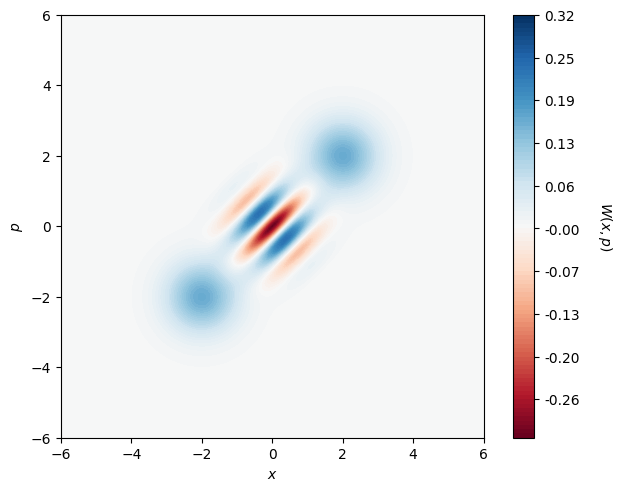

In [ ]:
#setup registers
qmr = bosonic_qiskit.QumodeRegister(1, num_qubits_per_qumode = 6)
qbr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)

#convenient labeling
qbit = qbr[0]
qumode = qmr[0]

#The circuit is initalized to |0>|0> by default
circuit = bosonic_qiskit.CVCircuit(qmr, qbr, cr)

#put the qubit into a superposition and then execute a controlled displacement of the cavity
alpha = 2
circuit.h(qbr[0])
circuit.cv_c_d(alpha, qmr[0], qbr[0])

#apply a rotation around an angle pi/4
theta = np.pi/4
circuit.cv_r(theta, qmr[0])

#measure qubit in x basis to collapse into even or odd cat state
circuit.measure_x(qbr, cr)

#simulate and plot
state, _, _ = bosonic_qiskit.util.simulate(circuit)
bosonic_qiskit.wigner.plot_wigner(circuit, state)
#the resulting plot is a cat state that is rotated 45 degrees

### Displacement
A coherent state $\lambda$ is defined as a state $|\lambda\rangle$ such that $a|\lambda \rangle = \lambda |\lambda\rangle$. We have already seen the most trivial coherent state: the vacuum state $|0\rangle$. Since $a|n\rangle = \sqrt{n}|n-1\rangle$, we find $a|0\rangle = 0$, where $0$ referes to the null ket. This is also the only sensible description of removing a photon from a state with no photons. Trivially, $|0\rangle$ is an eigenstate of $a$ with eigenvalue zero.

To make one coherent state from another, we need an operator that changes, or "displaces," the eigenvalues of $a$. This is called the displacement operator, and it is defined as
$$
D(\lambda) = e^{\lambda a^\dagger - \lambda^\ast a}
$$
By working out the commutator $[D(\theta), a] = D(\theta)[\theta a^\dagger - \theta^\ast a, a] = -D(\theta)\theta$, we find that
$$
D^\dagger(\theta) a D(\theta) = D^\dagger(\theta)(D(\theta)a-[D(\theta), a]) = D^\dagger(\theta)D(\theta)(a+\theta) = a+\theta
$$
This shows that $D(\theta)$ displaces the eigenvalues of $a$ by $\theta$, which means that up to a global phase, $D(\theta)|\lambda\rangle = |\lambda + \theta \rangle$. 
Furthermore, using the BCH identity, we see that
$$
D(\theta)D(\lambda) = e^{\lambda a^\dagger - \lambda^\ast a} e^{\theta a^\dagger - \theta^\ast a} =
e^{(\lambda+\theta) a^\dagger + (\lambda+\theta)^\ast a}e^{[\lambda a^\dagger - \lambda^\ast a, \theta a^\dagger - \theta^\ast a]/2}
= D(\theta + \lambda)e^{(\lambda\theta^\ast- \lambda^\ast\theta)/2}
$$
Taking $\lambda = -\theta$, it follows that
$$
D^\dagger(\theta) = D(-\theta)
$$
This also shows us that $D(\theta)D(\lambda) = D(\lambda)D(\theta)e^{\lambda^\ast \theta - \theta^\ast \lambda}$. We can treat $\theta$ and $\lambda$ as complex vectors in phase space. The fact that displacements commute up to a phase is important for applications such as GKP codes but only manifests when controlled-displacement gates are considered.

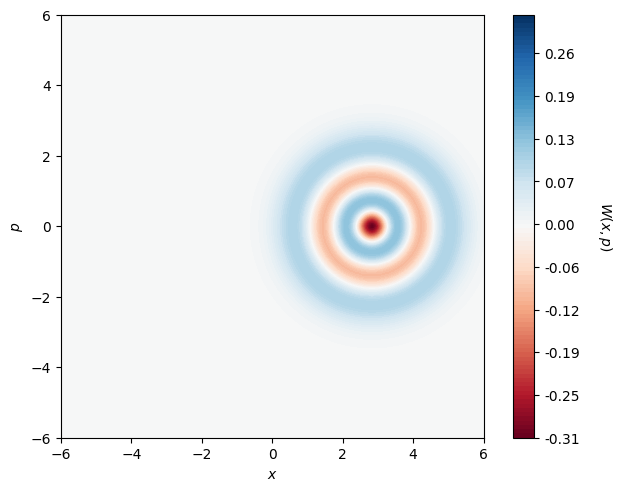

In [ ]:
circuit.clear() #reset

#Initialize Fock state and displace by alpha
alpha = 2
circuit.cv_initialize(3, qmr[0])
circuit.cv_d(alpha, qmr[0])

#Simulate and plot
state, _, _ = bosonic_qiskit.util.simulate(circuit)
bosonic_qiskit.wigner.plot_wigner(circuit, state)

#Resulting state is a displaced Fock state

### Single-mode squeezing


**Reminder**: The uncertainty principle is a fundamental result relating the variance of observables corresponding to noncommuting operators:
$$
\langle (\Delta A)^2 \rangle_\psi \langle (\Delta B)^2\rangle_\psi \geq \frac{1}{4}|\langle[A, B]\rangle_\psi|^2
$$
where we have defined $\Delta A \equiv A-\langle A \rangle_\psi$ and $\Delta B \equiv B - \langle B \rangle_\psi$.

If we want to make a measurement of the position, we would want to decrease the uncertainty in position, and, to protect the uncertainty principle, the uncertainty in the momentum would have to increase. Minimum-uncertainty states with $\langle (\Delta X)^2 \rangle < \frac{1}{2}$ are called position-squeezed states, and states with $\langle (\Delta P)^2 \rangle < \frac{1}{2}$ are called momentum-squeezed states.

The single-mode squeezing operator is expressed as follows:
$$
sq(\theta) = e^{\frac{1}{2}(\theta^\ast aa-\theta a^\dagger a^\dagger)}
$$
For simplicity, we consider $\theta$ to be real. To see why this is called the squeezing operator, we first introduce the anti-hermitian matrix $A = \frac{1}{2}(aa - a^\dagger a^\dagger)$ and let $U = sq(\theta) = e^{\theta A}$. Working out $[a, A] = -[a,\frac{1}{2}a^\dagger a^\dagger] = -a^\dagger$, the identity above gives the differential equation $\frac{\partial a_U}{\partial \theta} = -a_U^\dagger$. Plugging this and the adjoint of this equation into the definition of the quadrature operators gives
\begin{align*}
\frac{\partial X_{U}}{\partial \theta} &= -X_{U} & \frac{\partial P_{U}}{\partial \theta} &= P_{U}
\end{align*}
Integrating these equations gives the squeezed operators to be
\begin{align*}
X_{U} &= Xe^{-\theta}\\
P_{U} &= Pe^{\theta}
\end{align*}
We can use these operators to calculate the variance of $X$ and $P$ on the state $sq(\theta)|\psi\rangle$ for some arbitrary state $|\psi\rangle$:
\begin{align*}
\langle (\Delta X_{U})^2\rangle_{\psi} 
&=  e^{-2\theta}\langle (\Delta X)^2 \rangle_{\psi} \\
\langle(\Delta P_{U})^2 \rangle_{\psi} &= e^{2\theta}\langle (\Delta P)^2 \rangle_{\psi}
\end{align*}
This shows that applying the squeezing operator to a state compresses the variance of one of the quadratures at the expense of increased uncertainty in the other. In particular, applying the squeezing operator to a coherent state results in a state with $X$ variance $e^{-2\theta}/2$ and $P$ variance $e^{2\theta}/2$. If $\theta > 0$, this is a position-squeezed state, and choosing $\theta < 0$ results in a momentum-squeezed state. Since $\frac{e^{-2\theta}}{2}\frac{e^{2\theta}}{2} = \frac{1}{4}$, the squeezed state is also a minimum-uncertainty state.

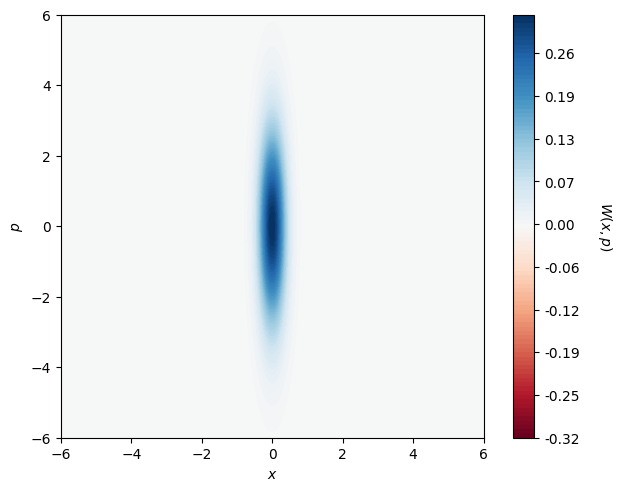

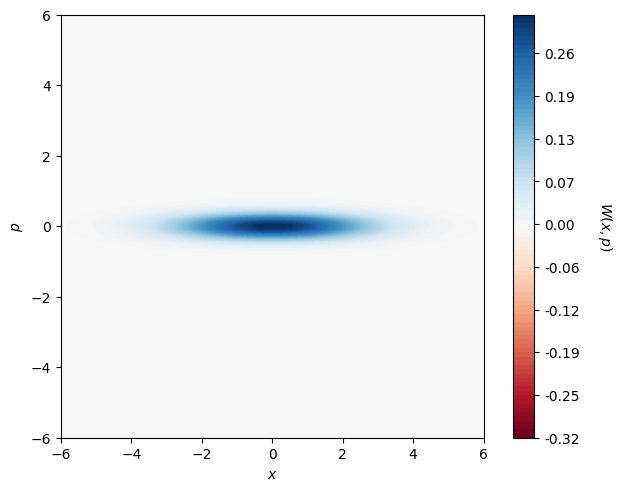

In [ ]:
circuit.clear()

s = 1
circuit.cv_initialize(0, qmr[0])
circuit.cv_sq(s, qmr[0])


state, _, _ = bosonic_qiskit.util.simulate(circuit)
#the resulting plot is a coherent state which is squeezed in the position quadrature
bosonic_qiskit.wigner.plot_wigner(circuit, state)
circuit.data.pop(1)

#plot a momentum-squeezed state for comparison
circuit.cv_sq(-s, qmr[0])
state, _, _ = bosonic_qiskit.util.simulate(circuit)
bosonic_qiskit.wigner.plot_wigner(circuit, state)

### Two-mode squeezing
The two-mode squeezing operator, though similar to the single-mode squeezing operator, serves a slightly different purpose. Rather than compressing the uncertainty into the position or momentum quadrature of a single mode, the two-mode squeezing operator has the same effect on nonlocal observables. This creates entanglement between the two modes, and in fact, this was the inspiration behind the famous EPR nonlocality paradox. For this operator, we introduce a second qumode with corresponding creation and annihilation operators $b^\dagger$ and $b$. Since these two operators act on disjoint subsystems, $[a,b] = [a^\dagger, b] = [a, b^\dagger] = [a^\dagger, b^\dagger] = 0$ and $[a,a^\dagger] = [b, b^\dagger] = 1$.

We can proceed to work out the effect of the two-mode squeezing operator, defined 
$$
sq2(\theta) = e^{\theta^\ast ab-\theta a^\dagger b^\dagger}
$$
We again define the anti-Hermitian operator $A = ab-a^\dagger b^\dagger$ and taking $\theta$ to be real, $sq2(\theta) = U = e^{\theta A}$. We first work out the commutator $[a,A] = -b^\dagger$. Applying the identity at the top gives
\begin{align*}
\frac{\partial a_{U}}{\partial \theta} &= -b^\dagger_{U} & \frac{\partial a^\dagger_{U}}{\partial \theta} &= -b_{U}
\end{align*}
We define the quadrature operators of the second oscillator to be $R \equiv \frac{b+b^\dagger}{\sqrt{2}}$ and $S \equiv \frac{b-b^\dagger}{i\sqrt{2}}$. We can combine the above equations to find
$$
X_{U} = \frac{a_{U}+a_{U}^\dagger}{\sqrt{2}} = \frac{\partial}{\partial \theta}\left(\frac{-b^\dagger_{U}-b_{U}}{\sqrt{2}}\right) = -\frac{\partial R_{U}}{\partial \theta}
$$
$$
P_{U} = \frac{a_{U}-a_{U}^\dagger}{i\sqrt{2}} = \frac{\partial}{\partial \theta}\left(\frac{-b^\dagger_{U}+b_{U}}{\sqrt{2}}\right) = \frac{\partial S_{U}}{\partial \theta}
$$
For $b$ and $b^\dagger$, the commutator works out to $[b, ab-a^\dagger b^\dagger] = [b, -a^\dagger b^\dagger] = -a^\dagger$, which then gives a similar set of equations for the transformed $b$ and $b^\dagger$ operators:
\begin{align*}
\frac{\partial b_{U}}{\partial \theta} &= -a^\dagger_{U} & \frac{\partial b^\dagger_{U}}{\partial \theta} &= -a_{U}
\end{align*}
Combining these equations similarly gives
$$
R_{U} = -\frac{\partial X_{U}}{\partial \theta}
$$
$$
S_{U} = \frac{\partial P_{U}}{\partial \theta}
$$
Adding these together, we get uncoupled differential equations for joint observables:
$$
\frac{\partial}{\partial \theta}(X_{U} \pm R_{U}) = -(X_{U} \pm R_{U}) \Rightarrow X_{U} \pm R_{U} = (X_{U} \pm R_{U})e^{-\theta}
$$
$$
\frac{\partial}{\partial \theta}(P_{U} \pm S_{U}) = P_{U} \pm S_{U} \Rightarrow P_{U} \pm S_{U} = (P_{U} \pm S_{U})e^{\theta}
$$
In the extreme limit $\theta \to \infty$, every state is mapped to an eigenvalue of $X+R$, demonstrating how the squeezing operator creates correlations between the state of two oscillators.

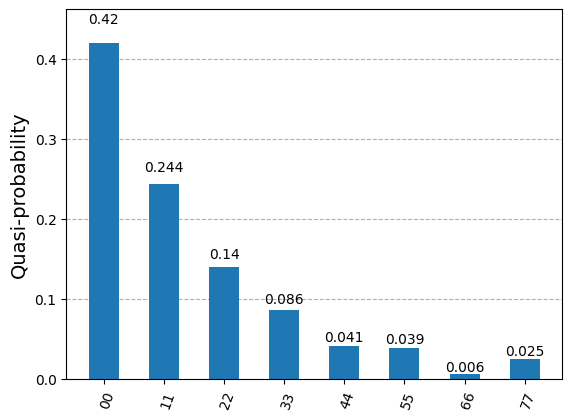

In [ ]:
qmr = bosonic_qiskit.QumodeRegister(2, num_qubits_per_qumode = 3)
circuit = bosonic_qiskit.CVCircuit(qmr)

circuit.cv_sq2(1, qmr[0], qmr[1])

_, result, fock_counts = bosonic_qiskit.util.simulate(circuit)
qiskit.visualization.plot_histogram(fock_counts)
#Notice the correlation between the state of the two qumodes! They always have the same photon number

## Beamsplitter

A beam splitter is the most simple way to mix two modes. Quantum mechanical descriptions of beamsplitters can be difficult to reconcile with the classical picture of a wave in a field that is partially reflected and partially transmitted because quantum mechanical effects such as vacuum fluctuations affect the behavior of the beamsplitter. The beamsplitter operator is defined as
$$
bs(\theta) = e^{\theta a^\dagger b - \theta^\ast b^\dagger a}
$$
First, we see how the annihilation and creation operators transform under this unitary. Taking $\theta$ to be real as before, we work out the commutator
$$
[a, a^\dagger b - b^\dagger a] = [a, a^\dagger b] = b
$$
Already, we can see that the effect of conjugation by the generator $a^\dagger b-b^\dagger a$ is to transform $a\to b$. Then, we also have the commutator
$$
[b, a^\dagger b - b^\dagger a] = [b,-b^\dagger a] = -a
$$
Using the identity above and these two commutators gives the equations
\begin{align*}
\frac{\partial a_{U}}{\partial \theta} &= b_{U} \\ \frac{\partial b_{U}}{\partial \theta} &= -a_{U}
\end{align*}
These two equations can be decoupled by taking the second derivative of the first equation with respect to $\theta$ and inserting it into the second equation, yielding
$$
\frac{\partial^2}{\partial \theta^2}a_U + a_{U} = 0
$$
This differential equation has sinusoidal solutions $a_{U} = A \cos(\theta) + B\sin(\theta)$. Putting in the boundary condition $a_{U} = a$, we get $A= a$, and the boundary condition on the first derivative gives $B = b$. With this, we see that the creation and annihilation operators on the first qumode transform into a linear combination of the creation and annihilation operators respectively on both modes:
$$
a_{U} = \cos(\theta)a + \sin(\theta)b
$$
By the same argument, we show that
$$
b_{U} = \cos(\theta)b - \sin(\theta)a
$$
In a classical beam splitter, we would expect that choosing an angle of $\frac{\pi}{4}$ would correspond to a 50/50 beamsplitter. 
First, we note that $bs(\theta)|0\rangle_A|0\rangle_B = |0\rangle_A|0\rangle_B$, which is apparent because $a|0\rangle_A = 0$ and $b|0\rangle_B = 0$. Letting $U = bs(-\frac{\pi}{4})$, we find
\begin{align}
bs(\frac{\pi}{4})|1\rangle_A |0\rangle_B &= U^\dagger a^\dagger|0\rangle_A |0\rangle_B \\
&= U^\dagger a^\dagger U U^\dagger|0\rangle_A|0\rangle_B \\
&= a_U^\dagger|0\rangle_A|0\rangle_B \\
&= \left(\frac{a^\dagger-b^\dagger}{\sqrt{2}}\right)|0\rangle_A|0\rangle_B \\
&= \frac{1}{\sqrt{2}}(|1\rangle_A|0\rangle_B - |0\rangle_A |1\rangle_B)
\end{align}
The beamsplitter operator transforms a state with one photon in qumode A into a state with a photon in either mode with equal probability.

Another interesting way to view the behavior of the beamsplitter is with coherent states. Suppose that the input state of qumode $B$ is a coherent state $|\alpha\rangle_B$, and qumode $A$ is in the vacuum state. The 50/50 beamsplitter transforms the state into
\begin{align*}
bs(\frac{\pi}{4})|\lambda\rangle_A|0\rangle_B &= U^\dagger D_A(\lambda)|0\rangle_A|0\rangle_B \\
&= U^\dagger e^{\lambda a^\dagger+\lambda^\ast a}UU^\dagger|0\rangle_A|0\rangle_B \\
&= e^{\frac{\lambda}{\sqrt{2}}(a^\dagger-b^\dagger)-\frac{\lambda^\ast}{\sqrt{2}}(a-b)}|0\rangle_A|0\rangle_B  \\
&= e^{\frac{\lambda}{\sqrt{2}}a^\dagger - \frac{\lambda^\ast}{\sqrt{2}}a}e^{-\frac{\lambda}{\sqrt{2}}b^\dagger + \frac{\lambda^\ast}{\sqrt{2}}b}|0\rangle_A|0\rangle_B \\
&= \left|\frac{\lambda}{\sqrt{2}}\right\rangle_A \left|-\frac{\lambda}{\sqrt{2}}\right\rangle_B
\end{align*}
The power of the beam is the average photon number. The power of the incident state is $|\lambda|^2$ on qumode A and $0$ on qumode $B$. After applying the beamsplitter, the power of the state on qumode A and B are both $\frac{|\lambda|^2}{2}$, so the power has been divided evenly among the two qumodes.

# Non-Gaussian Gates

## Conditional Gates

The most basic type of non-Gaussian gate is a controlled version of a Gaussian gate. Bosonic quantum computing relies on the ability to entangle the state of the qubit with the state of the qumode. Preparing interesting states in the qumode usually involves preparing a superposition in the qubit and then entangling the state of the cavity with the state of the qubit. This entanglement is performed through *conditional* or *controlled* gates.


Symbolically, a controlled gate can be constructed from a qumode gate of the form $e^{A}$, where $A$ is anti-Hermitian, by multiplying the matrix in the exponent with $\sigma_z$, resulting in the operator $e^{ \sigma_z A}$.

The operator $\sigma_z$ acts on a qubit state, with $\sigma_z |0\rangle = |0\rangle$ and $\sigma_z |1\rangle = -|1\rangle$. Thus, by applying the operator $e^{\sigma_z A}$ to a qumode in the arbitrary state $|\psi\rangle$ and a qubit in the even superposition
$$
\frac{|0\rangle + |1\rangle}{\sqrt{2}}
$$
the state obtained is
$$
e^{\sigma_z A}|\psi\rangle\left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right)  = \frac{e^{A}|\psi\rangle|0\rangle + e^{-A}|\psi\rangle |1\rangle}{\sqrt{2}}
$$
This state is now an even superposition of two states. If the qubit is in state $|0\rangle$, the operator $e^{A}$ is applied to the qumode, and if the qubit is in the state $|1\rangle$, the operator $e^{-A}$ is applied to the qumode. Evidently, using this recipe, the state of the qumode becomes entangled with the state of the qubit. Replacing $\sigma_z$ with $\sigma_x$ or $\sigma_y = i\sigma_x\sigma_z$ also creates a controlled gate with respect to a different axis of the qubit.

### Example: Multiple displacements
Using the previously derived identity for decomposing displacement gates into sums of displacements,
$$
D(\theta + \lambda) = D(\theta)D(\lambda)e^{(\lambda^\ast\theta - \theta^\ast \lambda)/2}
$$
Alternatively,
$$
D(\lambda + \theta) = D(\lambda)D(\theta)e^{-(\lambda^\ast\theta - \theta^\ast \lambda)/2}
$$
Putting these together,
$$
D(\theta)D(\lambda) = D(\lambda)D(\theta)e^{\lambda^\ast \theta - \theta^\ast \lambda}
$$
This gives the important identity
$$
I = D(\theta)D(\lambda)D(-\lambda)D(-\theta) = D(\lambda)D(\theta)D(-\lambda)D(-\theta)e^{-(\lambda^\ast \theta-\theta^\ast \lambda)}
$$
The above sequence of gates represents four consecutive displacements in phase space that form a parallelogram, ultimately returning to the origin. Let $\lambda = \frac{a}{2}$ and $\theta = \frac{ib}{2}$, where $a$ is real. Then we have
$$
I = D(\frac{a}{2})D(\frac{ib}{2})D(-\frac{a}{2})D(-\frac{ib}{2})e^{\frac{i}{2}ab}
$$
Where $ab$ can be recognized as the (signed) area of the square traced out by the consecutive displacements in phase space. We can measure this phase by preparing a qubit in the state $|+\rangle$ and then controlling the displacements along one of the directions to change the sign of the area depending on the state of the qubit:
\begin{align*}
CD(\frac{a}{2})D(\frac{ib}{2})CD(-\frac{a}{2})D(-\frac{ib}{2})|0\rangle|+\rangle &\longrightarrow \frac{1}{\sqrt{2}}|0\rangle\left(e^{-\frac{i}{2}ab}|0\rangle + e^{\frac{i}{2}ab}|1\rangle\right) \\
&= \frac{1}{\sqrt{2}}|0\rangle\left(e^{-\frac{i}{2}ab}\left(\frac{|+\rangle+|-\rangle}{\sqrt{2}}\right) + e^{\frac{i}{2}ab}\left(\frac{|+\rangle-|-\rangle}{\sqrt{2}}\right)\right) \\
&= |0\rangle\left(\left(\frac{e^{-\frac{i}{2}ab}+e^{\frac{i}{2}ab}}{2}\right)|+\rangle + \left(\frac{e^{-\frac{i}{2}ab}+e^{\frac{i}{2}ab}}{2}\right)|-\rangle\right) \\
&= |0\rangle(\cos(\frac{ab}{2})|+\rangle - i\sin(\frac{ab}{2})|-\rangle)\\
\end{align*}
The expectation value of $\sigma^x$ is then
$$
\langle \sigma_x \rangle = \cos^2(\frac{ab}{2}) - \sin^2(\frac{ab}{2}) = \cos(ab)
$$
This allows us to measure the geometric phase, which is four times the area of the rectangle traced out in phase space.

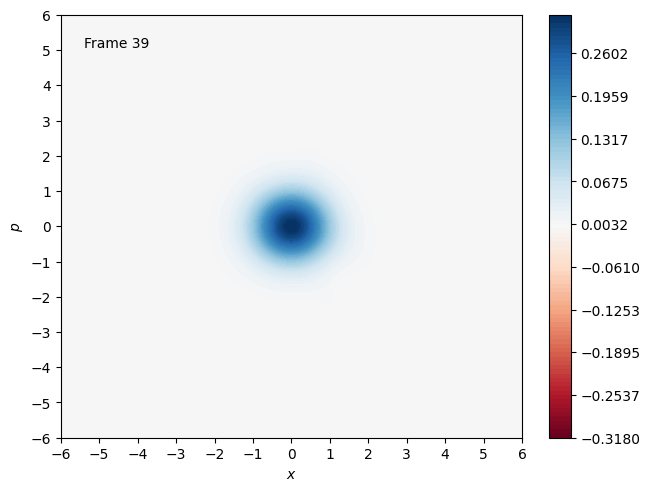

In [ ]:
qmr = bosonic_qiskit.QumodeRegister(1, num_qubits_per_qumode=4)
circuit = bosonic_qiskit.CVCircuit(qmr)

#Define the side lengths of the rectangle
a = 2
b = 1
animate_steps = 4

#Execute the sequence of displacements
circuit.cv_d(a, qmr[0])
circuit.cv_d(1j*b, qmr[0])
circuit.cv_d(-a, qmr[0])
circuit.cv_d(-1j*b, qmr[0])

#animate the result
anim = bosonic_qiskit.animate.animate_wigner(circuit, animation_segments=10);
HTML(anim.to_html5_video())

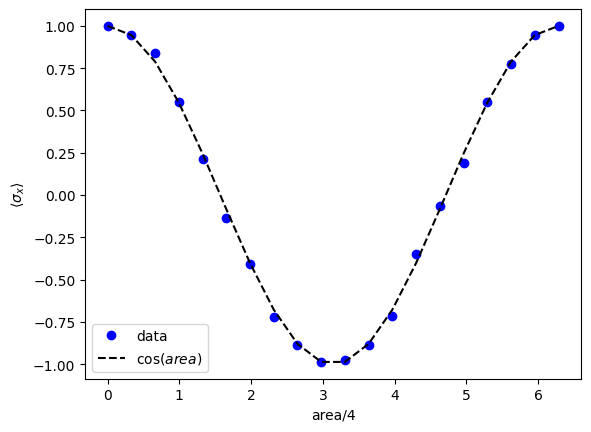

In [ ]:
qbr = qiskit.QuantumRegister(1)
creg = qiskit.ClassicalRegister(1)

def measure_phase(c): #choose a = b = sqrt(c) to get a square of area c
    shots = 1024
    circuit = bosonic_qiskit.CVCircuit(qmr, qbr, creg, probe_measure=True)
    circuit.h(qbr[0]) 

    circuit.cv_c_d(np.sqrt(c)/2, qmr[0], qbr[0])
    circuit.cv_d(1j*np.sqrt(c)/2, qmr[0])
    circuit.cv_c_d(-np.sqrt(c)/2, qmr[0], qbr[0])
    circuit.cv_d(-1j*np.sqrt(c)/2, qmr[0])

    circuit.measure_x(qbr[0], creg[0])
    state, result, fock_counts = bosonic_qiskit.util.simulate(circuit)
    counts = result.get_counts(circuit)
    return (counts.get('0',0)-counts.get('1',0))/shots

measure_phase(0)

c_vals = np.linspace(0, 2*np.pi, 20)
results = []
for c in c_vals:
    results.append(measure_phase(c))
plt.plot(c_vals, results, c = "b", linestyle = "None", marker = "o", label = "data")
plt.plot(c_vals, np.cos(c_vals), c = "k", linestyle = "--", label =r"$\cos(area)$")
plt.xlabel("area/4")
plt.ylabel(r"$\langle \sigma_x \rangle$")
plt.legend()

## Sources
[1] Lvovsky, A. I. “Squeezed Light.” arXiv, July 28, 2016. http://arxiv.org/abs/1401.4118.

[2] Gerry, Christopher, Peter Knight, and Peter L. Knight. Introductory quantum optics. Cambridge university press, 2005.